**Titanic** **Classification**

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

**Data** **Collection**

In [4]:
titanic_data = pd.read_csv("/content/titanic.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Data Preprocessing**

In [5]:
#  Number of rows and columns
titanic_data.shape

(891, 12)

In [6]:
# Get information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# To check the number of missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Handling the missing values**

In [8]:
# Dropping the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
# Replacing the missing vlaues in "Age" column with mean
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [10]:
# Finding the mode value of "Embarkked" Column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [11]:
print(titanic_data['Embarked'].mode()[0]) # 0 is the index

S


In [12]:
# Replacing the missing values in "Embarked" column with the mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Data Analysis**

In [13]:
# Getting statistical measures about the data (It's not useful while handling categorical column)
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Finding the number of people survived and not survived!
titanic_data['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

**Data Visualization**

<Axes: xlabel='Survived', ylabel='count'>

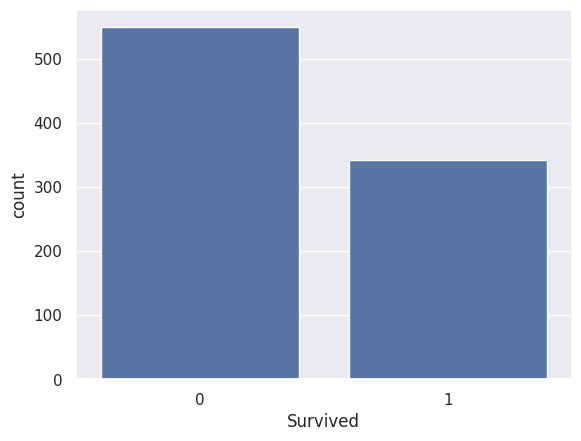

In [15]:
sns.set()
# Count plot for Survived Column
sns.countplot(x='Survived', data=titanic_data)

In [16]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

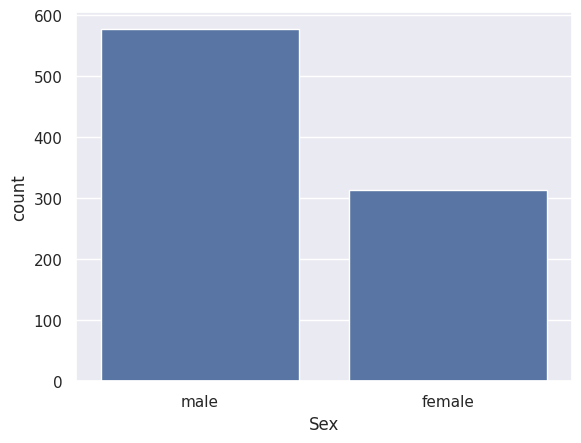

In [19]:
sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

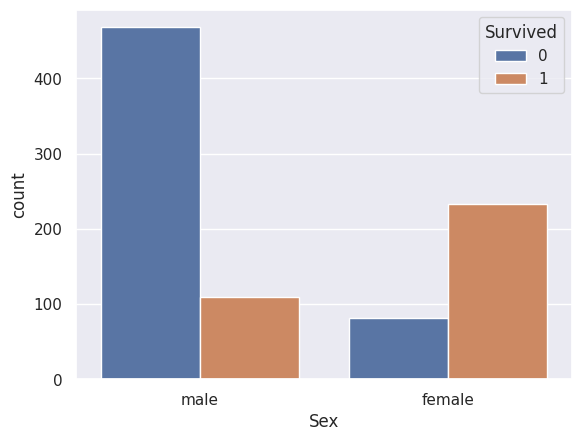

In [18]:
# Number of survivors by Gender wise
sns.countplot(x="Sex", hue="Survived", data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

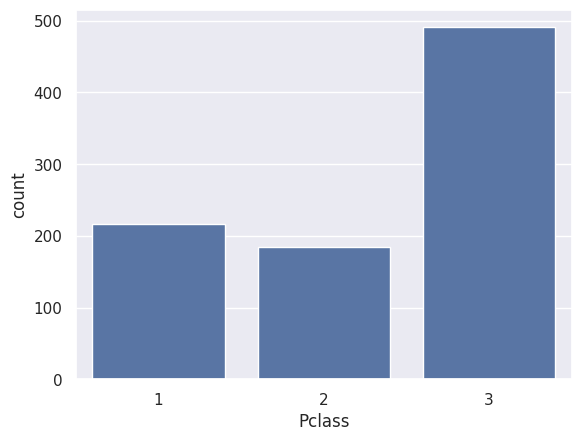

In [20]:
# Creating a Count plot for Pclass Column
sns.countplot(x="Pclass", data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

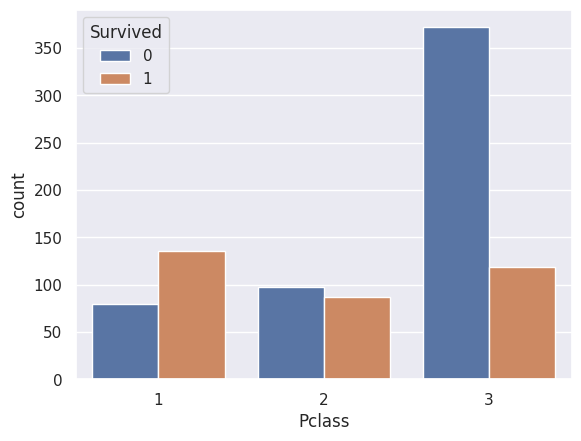

In [21]:
# Number of Survivers by Pclass wise
sns.countplot(x="Pclass", hue="Survived", data=titanic_data)

**Encoding the Categorical Columns**

In [22]:
titanic_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [23]:
titanic_data["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [24]:
# Converting Categorical Columns
titanic_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [25]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


**Feature Selection**

In [26]:
X = titanic_data.drop(columns=["PassengerId", "Name", "Ticket", "Survived"], axis=1)
Y = titanic_data['Survived']
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [27]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


**Model Training**

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [32]:
model_prediction = model.predict(X_test)




accuracy_score(model_prediction, Y_test)

0.7821229050279329

**Model Evaluation**

In [33]:
confusion_matrix(Y_test, model_prediction)

array([[91,  9],
       [30, 49]])

In [34]:
results = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Score': [0.78]
})

results

,Model,Score
0,Logistic Regression,0.78


**Model Prediction**

In [35]:
model_prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

**k-means-clustering**

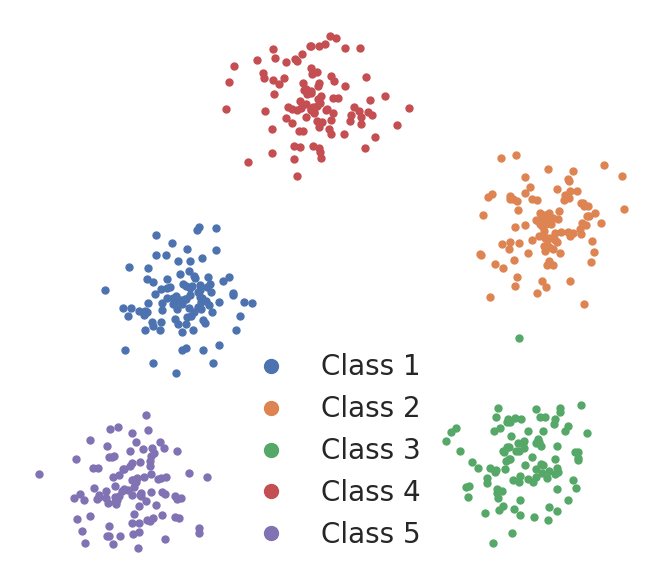

In [38]:
lower, higher = -10, 10
points = 100
clusters = 5
width = 1.2
random_state = 1

np.random.seed(random_state)

data = []
for ix in range(clusters):
    cx, cy = np.random.randint(lower, higher), np.random.randint(lower, higher),
    x = np.random.normal(cx, width, size=(points,))
    y = np.random.normal(cy, width, size=(points,))
    data.append(
        pd.DataFrame({
            'x': x,
            'y': y,
            'label': ix + 1,
        })
    )
data = pd.concat(data)

X = data.drop('label', axis=1)
y = data.drop(['x', 'y'], axis=1)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.set_aspect('equal')
plt.axis('off')
fig.tight_layout()
for group, group_data in data.groupby('label'):
    plt.plot(group_data.x, group_data.y, 'o', ms=5, label=f'Class {group}')
lgd = ax.legend(loc=8, fontsize=20, frameon=False, markerscale=2)


In [40]:
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2)**2))
vec1 = np.array([3, 0])
vec2 = np.array([0, 4])
euclidean_distance(vec1, vec2)

5.0

In [41]:
def squared_difference(dataset, vector, columns=['x', 'y']):
    return ((dataset[columns[0]] - vector[columns[0]])**2 +
                  (dataset[columns[1]] - vector[columns[1]])**2)

In [42]:
number_of_clusters = len(y.label.unique())
centroids = X.sample(number_of_clusters, random_state=random_state)
number_of_clusters

5

In [43]:
def cluster_dataset(dataset, centroids):
    distances = pd.concat([
        ((dataset - centroid)**2).sum(axis=1)
        for ix, centroid in centroids.iterrows()],
        axis=1,
    )
    return dataset.assign( cluster = distances.idxmin(axis=1)), distances.min(axis=1).sum()


In [44]:
clustered, _ = cluster_dataset(X, centroids)

In [45]:
clustered.cluster.unique()

array([2, 3, 1, 0, 4])

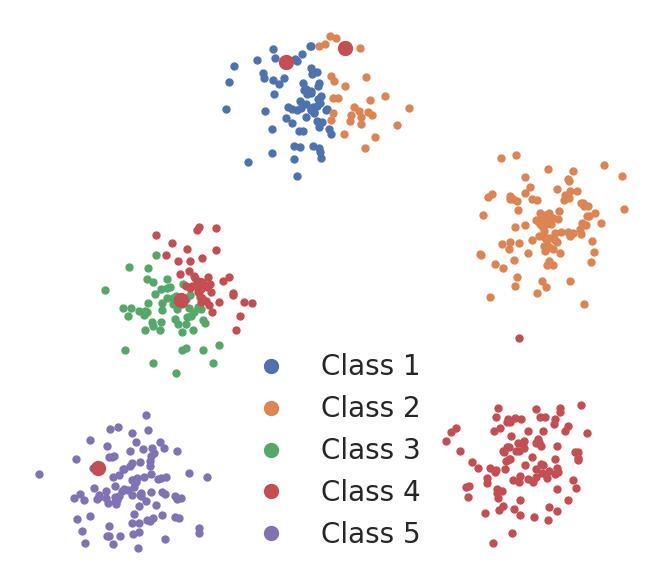

In [51]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.set_aspect('equal')
plt.axis('off')
fig.tight_layout()
for group, group_data in clustered.groupby('cluster'):
    plt.plot(group_data.x, group_data.y, 'o', ms=5, label=f'Class {group + 1}')

for ix, centroid in centroids.iterrows():
    ax.plot(centroid.x, centroid.y, 'ro', ms=10)
lgd = ax.legend(loc=8, fontsize=20, frameon=False, markerscale=2)